# Create the MIRI MRS field locations for the SIAF #

This notebook walks through an example for channel 1A, then calls a python wrapper script in order to do the actual reference file/figure creation for all channels.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os

Import the MIRI coordinates code from https://github.com/STScI-MIRI/miricoord and ensure that it is on the PYTHONPATH.  Also ensure that the output data directory is set:<br>
setenv MIRICOORD_DATA_DIR /YourLocalPathToData/ (this is where io will happen)

In [3]:
data_dir=os.path.expandvars('$MIRICOORD_DATA_DIR')

In [4]:
outfile=os.path.join(data_dir,'siaf/mrs/temp/miri_siaf_mrs.csv')

Import the python code that actually does the heavy lifting

In [5]:
import miricoord.miricoord.mrs.makesiaf.makesiaf_mrs as makesiaf

Make a 'values' dictionary for Channel 1A which will contain all of the relevant information

In [6]:
values=makesiaf.create_siaf_oneband('1A')

Let's see all of the various keys within this dictionary

In [7]:
values.keys()

dict_keys(['distfilename', 'slice_name', 'slice_num', 'slice_apername', 'slice_alpharef', 'slice_betaref', 'slice_v2ref', 'slice_v3ref', 'slice_alpha_corners', 'slice_beta_corners', 'slice_v2_corners', 'slice_v3_corners', 'inscr_apername', 'inscr_alpharef', 'inscr_betaref', 'inscr_v2ref', 'inscr_v3ref', 'inscr_alpha_corners', 'inscr_beta_corners', 'inscr_v2_corners', 'inscr_v3_corners'])

We can print the v2,v3 corner coordinates of the bounding box inscribed within the individual slice footprints.  Note that the first point in the box is repeated since it simplifies life when plotting.

In [8]:
values['inscr_v2_corners'],values['inscr_v3_corners']

(array([-505.03513898, -505.56853787, -502.24410266, -501.73812088,
        -505.03513898]),
 array([-316.66426809, -320.33166868, -320.84884071, -317.1297726 ,
        -316.66426809]))

Now make a figure to show what it looks like:

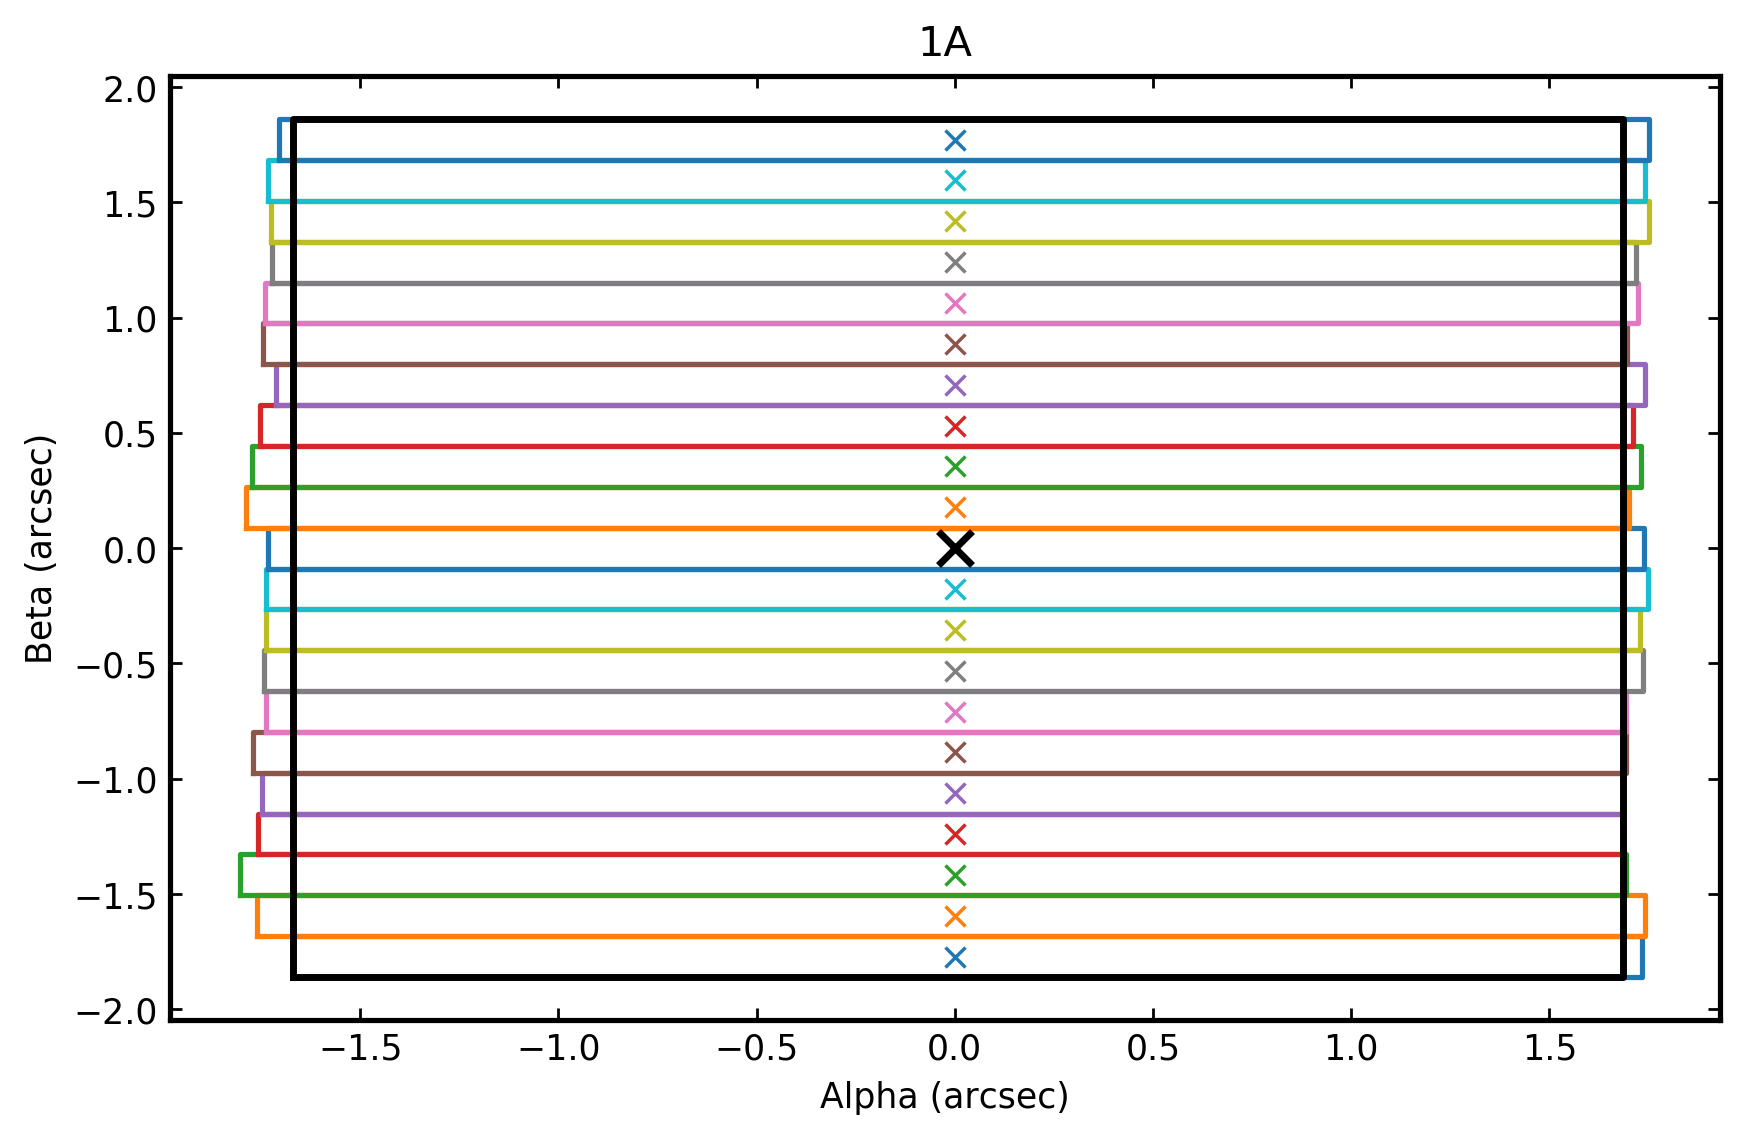

In [9]:
makesiaf.makeabplot(values,'1A')

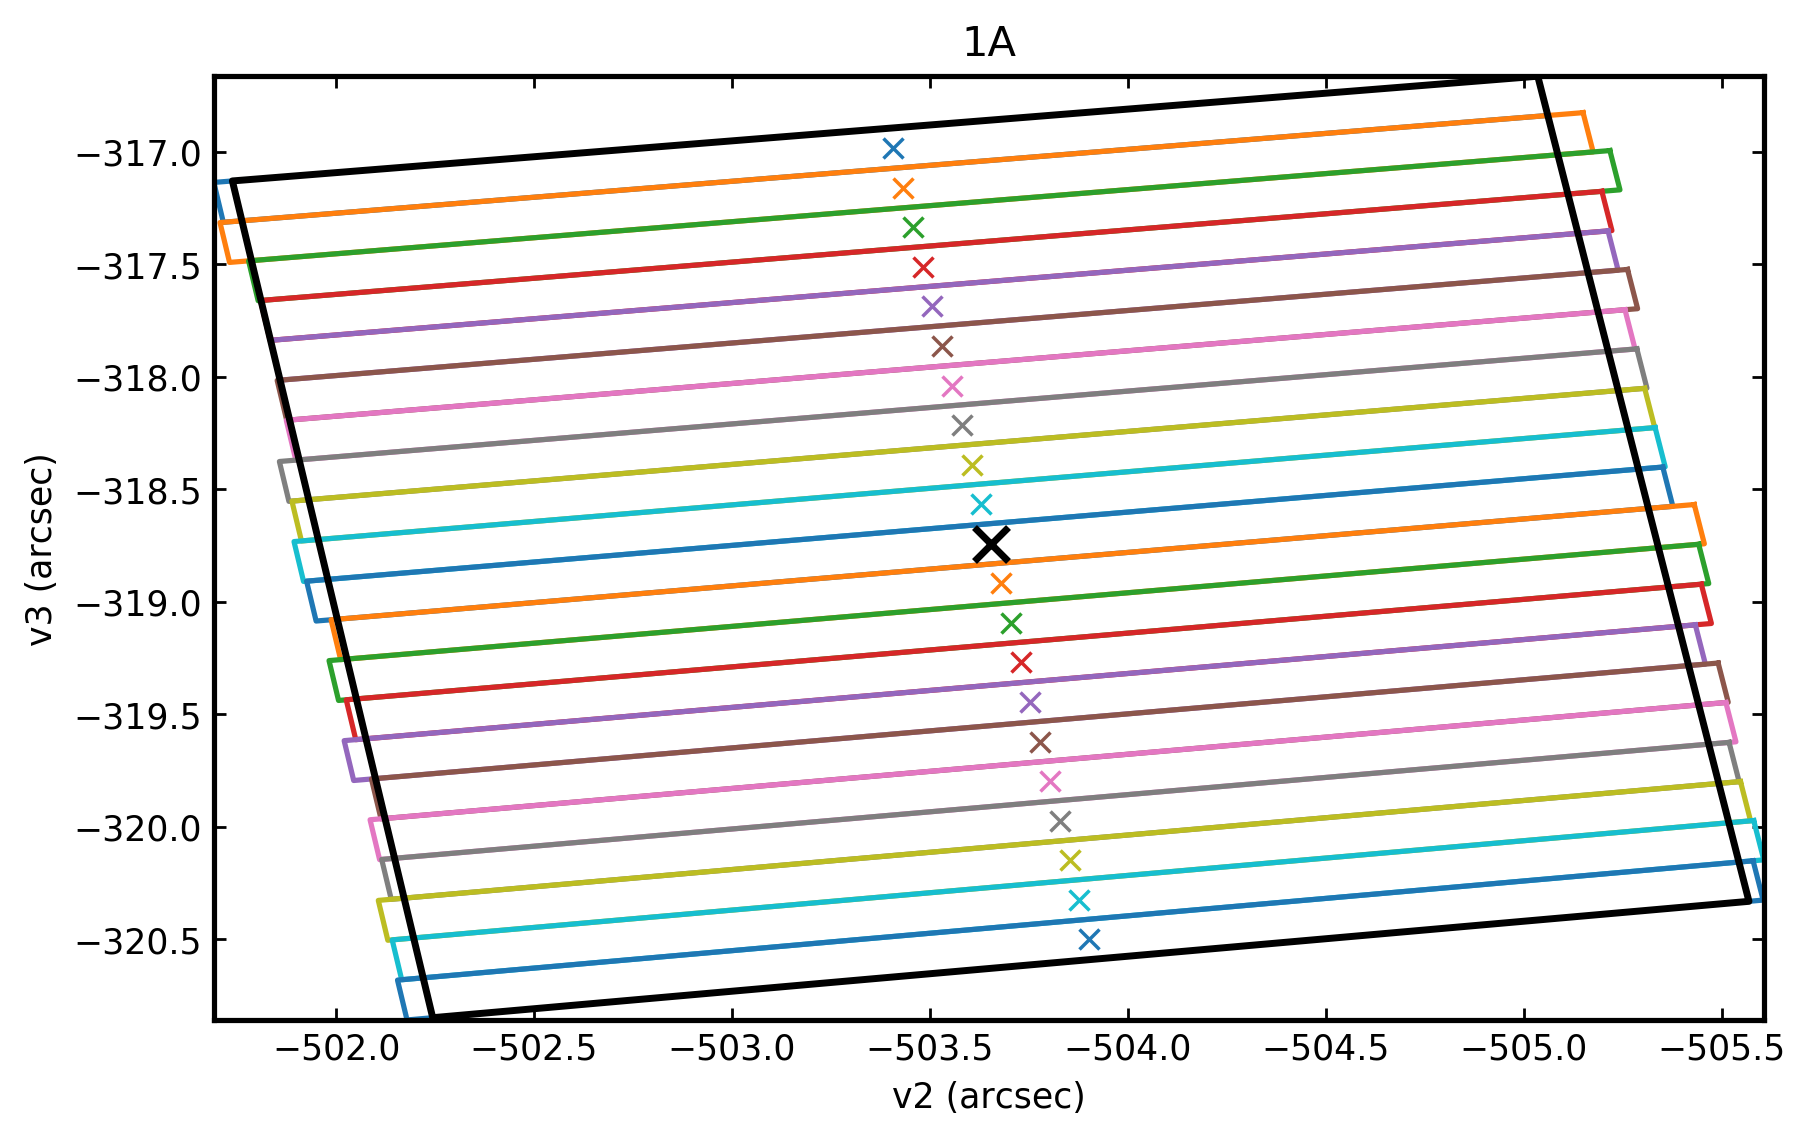

In [10]:
makesiaf.makev2v3plot(values,'1A')

## Now run the script to actually produce all of the output files ##

In [11]:
makesiaf.create_siaf_all()

MIRIFU_CHANNEL1A 3.3 x 3.7
MIRIFU_CHANNEL1B 3.4 x 3.7
MIRIFU_CHANNEL1C 3.3 x 3.7
MIRIFU_CHANNEL2A 4.2 x 4.8
MIRIFU_CHANNEL2B 4.2 x 4.8
MIRIFU_CHANNEL2C 4.2 x 4.8
MIRIFU_CHANNEL3A 5.7 x 6.2
MIRIFU_CHANNEL3B 5.7 x 6.2
MIRIFU_CHANNEL3C 5.6 x 6.2
MIRIFU_CHANNEL4A 7.2 x 7.9
MIRIFU_CHANNEL4B 7.2 x 7.9
MIRIFU_CHANNEL4C 7.1 x 7.8
Ch1 3.3 x 3.7
Ch2 4.2 x 4.8
Ch3 5.6 x 6.2
Ch4 7.2 x 7.9
